In [29]:
#import required libraries
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time
#%matplotlib inline

In [30]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [31]:
#load test iamge
test1 = cv2.imread('data/Suyash.jpg')
#convert the test image to gray image as opencv face detector expects gray images 
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

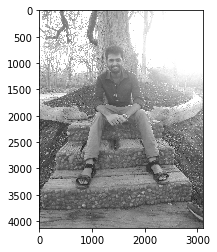

In [32]:
#if you have matplotlib installed then  
plt.imshow(gray_img, cmap='gray')  

# or display the gray image using OpenCV 
# cv2.imshow('Test Imag', gray_img) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

In [33]:
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

Faces found:  3


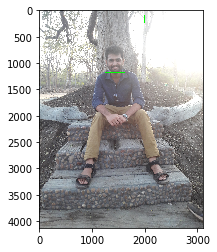

In [41]:
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);  
 
#print the number of faces found 
print('Faces found: ', len(faces))
for x, y, w, h in faces:     
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)
#convert image to RGB and show image 
plt.imshow(convertToRGB(test1))